### Q1) Outlier Detection (20 Marks)

Outlier detection (also known as 'anomaly detection') is the process of finding observation points that deviate from other observations. Such observation points are called outliers or anomalies. In this question, you will employ simple visualization and statistical techniques to find the outliers and then, you will apply outlier detection algorithms.

You will be using forestfires.csv dataset.

<strong>Note: You are required to submit the html files of both Q1 and Q2. Format should be q1_firsname_lastname_rollno.html</strong>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import cm

### Loading the dataset

In [2]:
#loading the dataset
data_df = pd.read_csv("forestfires.csv")
data_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,4.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,0.4,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data = data_df.copy()
data = data.dropna()

### Outlier Visualization

### **Box-Plots**

Plot box-plots for "**FFMC**" 

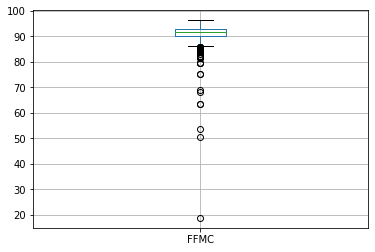

In [4]:
#Write code here
data.boxplot(["FFMC"])
plt.show()

Plot box-plots for "**Day Vs Temp**" and "**Month Vs Temp**" and comment on your results.  

C:\Users\gift\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


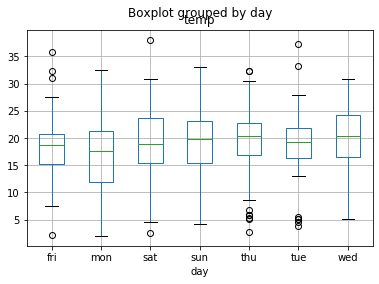

In [5]:
#Write code here for day vs temp
data.boxplot(column = ['temp'], by = 'day')

C:\Users\gift\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


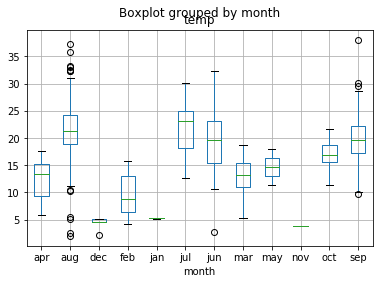

In [6]:
#Write code here for month vs temp
data.boxplot(column = ['temp'], by = 'month')

As expected, there is a larger variation in the monthly temperature as compared to the per day temperature

### **Scatter-plot**

Plot scatter-plot for "**DC Vs Area**". Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

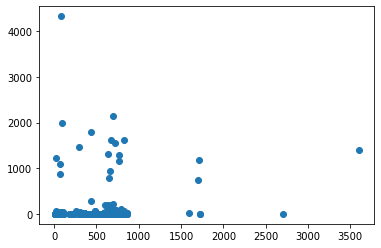

In [7]:
#Write code here
plt.scatter(data["DC"], data["area"])

### Outlier Detection 

### **Standard Deviation**

If certain point is some standard deviation(threshold) away from the mean it can be identified as outlier. For **Area and Temp**, output the list of values that are identified as outliers using optimal value of threshold.

In [8]:
from numpy import mean
from numpy import std
#Write code here

areaOutliers = []
areaMean = data["area"].mean()
areaStd = data["area"].std()

for i in data["area"]:
    if i > 3*areaStd + areaMean or i < areaMean - 3*areaStd:
        areaOutliers.append(i)
        
tempOutliers = []
tempMean = data["temp"].mean()
tempStd = data["temp"].std()

for j in data["temp"]:
    if j > tempMean + 3 * tempStd or j < tempMean - 3* tempStd:
        tempOutliers.append(j)
    
        
print("The list of outliers in area are: ", areaOutliers, "\n")
print("The list of outliers in temp are: ", tempOutliers)

The list of outliers in area are:  [1314.0, 4328.4, 1392.4, 2000.0, 1609.4, 2137.0, 1090.84, 1224.24, 1786.45, 1463.52, 1545.18, 1622.18, 1156.04, 1290.03, 1174.63] 

The list of outliers in temp are:  [38.1, 37.3]


* **What standard deviation threshold did you use to detect the outliers and why?**

Anything outside 3 standard deviations of the mean was considered an outlier. This is because in any given distribution, 99% of the values lie within 3 stddevs of the mean, so any value that is not within this range would be an outlier

### ***IQR***

For **Area and Temp**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [9]:
#Write code here

k = 1.5

areaQ1 = np.percentile(data["area"], 25)
areaQ3 = np.percentile(data["area"], 75)
IQRArea = areaQ3 - areaQ1

lowerOutlierArea = areaQ1 - (k * IQRArea)
HigherOutlierArea = areaQ3 + (k * IQRArea)

IQROutlierArea = []

for i in data["area"]:
    if i < lowerOutlierArea or i > HigherOutlierArea:
        IQROutlierArea.append(i)
        
tempQ1 = np.percentile(data["temp"], 25)
tempQ3 = np.percentile(data["temp"], 75)
IQRTemp = tempQ3 - tempQ1

lowerOutlierTemp = tempQ1 - (k * IQRTemp)
HigherOutlierTemp = tempQ3 + (k * IQRTemp)

IQROutlierTemp = []

for i in data["temp"]:
    if i < lowerOutlierTemp or i > HigherOutlierTemp:
        IQROutlierTemp.append(i)
        

print("The list of outliers in area are: ", IQROutlierArea, "\n")
print("The list of outliers in temp are: ", IQROutlierTemp)

The list of outliers in area are:  [1314.0, 942.4, 4328.4, 1392.4, 779.5, 866.0, 2000.0, 1609.4, 2137.0, 19.23, 23.41, 24.23, 26.0, 26.13, 27.35, 28.66, 28.66, 29.48, 30.32, 31.72, 31.86, 32.07, 35.88, 36.85, 37.02, 37.71, 48.55, 49.37, 58.3, 64.1, 71.3, 88.49, 95.18, 103.39, 105.66, 154.88, 196.48, 200.94, 212.88, 1090.84, 22.03, 24.77, 1224.24, 1786.45, 1463.52, 1545.18, 34.36, 1622.18, 111.22, 1156.04, 28.19, 1290.03, 39.35, 1174.63, 42.87, 24.59, 28.74, 30.18, 70.76, 51.78, 746.28, 185.76, 82.75, 61.13, 38.48, 70.32, 278.53, 26.43, 46.7, 43.32, 40.54, 49.59, 54.29] 

The list of outliers in temp are:  [2.0, 38.1, 2.2, 4.2, 2.7, 37.3, 35.9, 2.6, 3.8]


* **What k-value did you use to detect the outliers and why?**

k was chosen as 1.5 as that is the standard value used for IQR technique to detect outliers

* **Which parameter (IQR or standard deviation) is better outlier detection? Give reason.**

Standard deviation is a better outlier detector as IQR may give us False Positives, whereas the outliers detected by the standard deviation method are always correct

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 

In [10]:
#Removing month and day colums
data = data.drop('month', axis = 1)
data = data.drop('day', axis = 1)

**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [27]:
from sklearn.preprocessing import MinMaxScaler
#Write your code here for minmax scaling

scale = MinMaxScaler()
X = scale.fit(data)
Y = X.transform(data)

Y

array([[0.87096774, 0.08649207, 0.        , ..., 0.70652174, 0.        ,
        0.        ],
       [0.92774194, 0.11819435, 0.18481555, ..., 0.07608696, 0.        ,
        0.        ],
       [0.92774194, 0.14679531, 0.18976398, ..., 0.11956522, 0.        ,
        0.        ],
       ...,
       [0.8116129 , 0.19159201, 0.18384254, ..., 0.70652174, 0.        ,
        0.00257832],
       [0.97677419, 0.49931082, 0.16969225, ..., 0.41304348, 0.        ,
        0.        ],
       [0.78451613, 0.00654721, 0.02846738, ..., 0.4673913 , 0.        ,
        0.        ]])

**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [40]:
#write your code here

loc = LocalOutlierFactor(n_neighbors = 10, algorithm = 'auto')
scaled = loc.fit_predict(Y)
# scaled

C:\Users\gift\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


* **What value did you use for the 'n_neighbours'?**

In [41]:
15

15

**3.** Print the length of outliers returned.

In [42]:
locOut = []

for i in scaled:
    if i == -1:
        locOut.append(i)
        
print("Length of Outliers is ", len(locOut))

Length of Outliers is  52


### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [44]:
#Write your code here
from sklearn.ensemble import IsolationForest

isf = IsolationForest(max_samples = 50).fit(Y)

labIsf = isf.predict(Y)

# labIsf

C:\Users\gift\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\gift\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\gift\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


* **What value did you use for the 'max_samples'?**

In [45]:
50

50

**2.** Print the length of outliers returned.

In [46]:
outIsf = []

for i in labIsf:
    if i < 0:
        outIsf.append(i)
        
print("There are", len(outIsf), "Outliers \n")

There are 52 Outliers 



* **Compare the results from both LOC and Isolation Forest:** 

Both LOC and Isolation Forest return the same number of outliers